In [1]:
import numpy as np
import pandas as pd

from sktime.forecasting.arima import ARIMA, AutoARIMA
# from sktime.forecasting.arima import StatsModelsARIMA
# from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

import pandas_datareader.data as web

# тесты диагностики
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
y = np.log(web.DataReader(name='M2SL', data_source='fred', start='1995-01-01'))
y.index = y.index.to_period(freq='M')

In [3]:
forecaster = AutoARIMA(information_criterion='bic', test='kpss', seasonal=False)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'intercept': np.float64(0.0019404499469396785),
 'ar.L1': np.float64(0.6115582239435952),
 'sigma2': np.float64(1.9712747511061015e-05),
 'order': (1, 1, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': np.float64(-2871.7689553428318),
 'aicc': np.float64(-2871.701539612495),
 'bic': np.float64(-2860.110643248481),
 'hqic': np.float64(-2867.1333893985707)}

In [4]:
forecaster = AutoARIMA(information_criterion='aic', test='kpss', seasonal=False)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'intercept': np.float64(0.0019404499469396785),
 'ar.L1': np.float64(0.6115582239435952),
 'sigma2': np.float64(1.9712747511061015e-05),
 'order': (1, 1, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': np.float64(-2871.7689553428318),
 'aicc': np.float64(-2871.701539612495),
 'bic': np.float64(-2860.110643248481),
 'hqic': np.float64(-2867.1333893985707)}

In [5]:
forecaster = AutoARIMA(information_criterion='bic', test='adf', seasonal=False)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'intercept': np.float64(0.0019404499469396785),
 'ar.L1': np.float64(0.6115582239435952),
 'sigma2': np.float64(1.9712747511061015e-05),
 'order': (1, 1, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': np.float64(-2871.7689553428318),
 'aicc': np.float64(-2871.701539612495),
 'bic': np.float64(-2860.110643248481),
 'hqic': np.float64(-2867.1333893985707)}

In [6]:
forecaster = ARIMA(order=(1,1,0), trend='c')
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:               SARIMAX(1, 1, 0)   Log Likelihood                1438.884
Date:                Tue, 25 Mar 2025   AIC                          -2871.769
Time:                        11:36:51   BIC                          -2860.111
Sample:                    01-31-1995   HQIC                         -2867.133
                         - 01-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.000      5.810      0.000       0.001       0.003
ar.L1          0.6116      0.016     37.571      0.000       0.580       0.643
sigma2      1.971e-05   5.09e-07     38.728      0.000    1.87e-05    2.07e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              8121.21
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# model_df = p+q
acorr_ljungbox(forecaster.predict_residuals(y).dropna() , lags=[5], model_df=2)

,lb_stat,lb_pvalue
5,10.400755,0.015449


In [8]:
lm_stat, lm_pval, f_stat, f_pval = het_arch(forecaster.predict_residuals(y).dropna(), nlags=5, ddof=2)

lm_stat, lm_pval

(np.float64(74.24351307803958), np.float64(1.3380127246625773e-14))

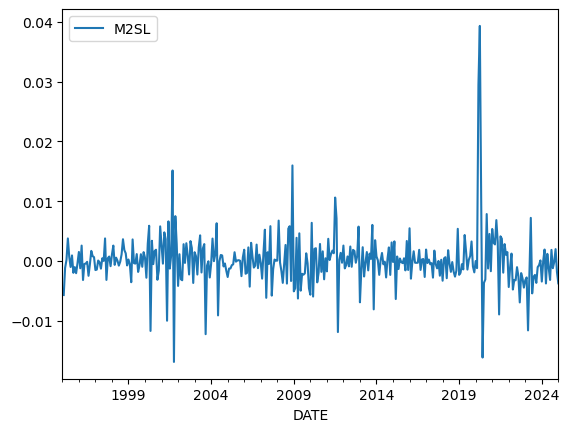

In [9]:
forecaster.predict_residuals(y).plot()

plt.show()

In [10]:
forecaster = AutoARIMA(information_criterion='bic', test='adf', seasonal=False, max_p = 10, max_q = 10)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'intercept': np.float64(0.0019404499469396785),
 'ar.L1': np.float64(0.6115582239435952),
 'sigma2': np.float64(1.9712747511061015e-05),
 'order': (1, 1, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': np.float64(-2871.7689553428318),
 'aicc': np.float64(-2871.701539612495),
 'bic': np.float64(-2860.110643248481),
 'hqic': np.float64(-2867.1333893985707)}